In [1]:
import pandas as pd
pd.__version__

import matplotlib.pyplot as plt

import matplotlib.patches as patches

import re


# MLB Pitch Analysis

## Project

`This goal of this project is to predict the next pitch based on information about the teams, the pitcher, the batter, 
and the in game situation.`

## Instructions

`Start outlining the way you would go about the model-building process with the goal of predicting the probability
that the next thrown pitch will be a fastball, slider, change-up, etc.`

## Data

`The data given for this project is from the 2011 MLB season.`


In [2]:
data = pd.read_csv("pitches", sep=",")

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [4]:
print(data.shape)

(718961, 125)


## Clean the 2011 MLB data

In [5]:
# There are a number of columns with all nan

data.iloc[0:4, 40:51]

,y,sv_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0
0,180.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,168.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop the columns with any nan

clean_data = data.dropna(axis='columns', how='any')

print(clean_data.shape)

(718961, 39)


In [7]:
clean_data.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,home_team_runs,pitch_des,pitch_id,type,x,y,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,0,Ball,3,B,105.58,180.46,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,0,Ball,4,B,99.57,170.96,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,0,Called Strike,5,S,95.28,152.83,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,0,"In play, out(s)",6,X,93.56,168.37,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,0,Called Strike,10,S,99.57,170.96,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [8]:
print(data.columns[data.isna().any()])

print(data.columns[data.isna().any()].shape)

Index([u'event2', u'event3', u'event4', u'score', u'pitch_tfs',
       u'pitch_tfs_zulu', u'sv_id', u'start_speed', u'end_speed', u'sz_top',
       u'sz_bot', u'pfx_x', u'pfx_z', u'px', u'pz', u'x0', u'z0', u'y0',
       u'vx0', u'vz0', u'vy0', u'ax', u'az', u'ay', u'break_length',
       u'break_y', u'break_angle', u'pitch_type', u'type_confidence', u'zone',
       u'nasty', u'spin_dir', u'spin_rate', u'cc', u'on_1b', u'on_2b',
       u'on_3b', u'runner1_id', u'runner1_start', u'runner1_end',
       u'runner1_event', u'runner1_score', u'runner1_rbi', u'runner1_earned',
       u'runner2_id', u'runner2_start', u'runner2_end', u'runner2_event',
       u'runner2_score', u'runner2_rbi', u'runner2_earned', u'runner3_id',
       u'runner3_start', u'runner3_end', u'runner3_event', u'runner3_score',
       u'runner3_rbi', u'runner3_earned', u'runner4_id', u'runner4_start',
       u'runner4_end', u'runner4_event', u'runner4_score', u'runner4_rbi',
       u'runner4_earned', u'runner5_id', u'runn

In [9]:
clean_data.columns

Index([u'uid', u'game_pk', u'year', u'date', u'team_id_b', u'team_id_p',
       u'inning', u'top', u'at_bat_num', u'pcount_at_bat', u'pcount_pitcher',
       u'balls', u'strikes', u'fouls', u'outs', u'is_final_pitch',
       u'final_balls', u'final_strikes', u'final_outs', u'start_tfs',
       u'start_tfs_zulu', u'batter_id', u'stand', u'b_height', u'pitcher_id',
       u'p_throws', u'at_bat_des', u'event', u'away_team_runs',
       u'home_team_runs', u'pitch_des', u'pitch_id', u'type', u'x', u'y',
       u'created_at', u'added_at', u'modified_at', u'modified_by'],
      dtype='object')

In [10]:
# Check is there's any column with nan

print(clean_data.columns[clean_data.isna().any()])

print(clean_data.columns[clean_data.isna().any()].shape)

Index([], dtype='object')
(0,)


## Analyze the cleaned data

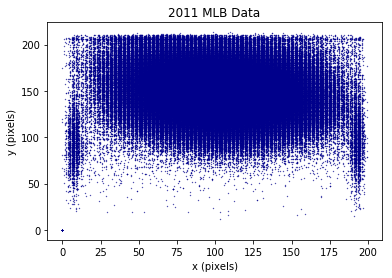

In [11]:
clean_data.plot.scatter(x='x', y='y', c='DarkBlue', s=0.1)


# Add labels and title
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
#plt.xlim(0,220)
#plt.ylim(0,250)
plt.title('2011 MLB Data')

# Show the plot
plt.show()

## Analysis Approach for Pitch Type Feature

`The pitch type (fastball, curveball, slider, etc) depends on many factors such as the release position, release
velocity, trajectory, spin, strike zone position, and the strike zone velocity. The 2011 MLB data given only has
information on the coordinates labeled x and y (decribed as the horizontal and vertical location of the pitch as 
it crossed home plate using the old Gameday coordinates). In order to gain insight on the source of these 
coordinates, I have compared the 2011 data with another data set from 2019 (sources cited below).` <br> <br>
`Based on the analysis below, a rough approximation is made to transform from the Gameday coordinates (x, y) 
to a coordinate centered on the edge of home plate in the strike zone. These are named (x_sz, y_sz). The 
conversion is performed by a translation in x and y, and then multiplying by a scale factor for the axis.` <br> <br>
`There is no information in the 2011 data given for release position, release velocity, trajectory, spin, strike 
zone position, or the strike zone velocity. Without this information, the pitch type will be roughly
approximated using the following assumptions:`
- The pitch is classified by it's position in the strike zone. 
    - The strike zone is a 3x3 grid box centered on home plate in x (horizontal) and above the ground in y (vertical).
    - The width of the strike zone is the width of home plate. 
    - The bottom and top bounds of the strike zone depend on the batter height. These are averaged from the 2019 data.
    - Four Seam Fastball (FA): near the center of the strike zone.
    - Curveball(CU): near the center and bottom of the strike zone.
    - Slider (SL): near the bottom right of the strike zone for a right handed pitcher (data is right handed in this approximation).
- The x,y coordinates in the 2011 data (old Gameday) are roughly converted to strike zone coordinates x_sz, y_sz to classify the pitch.
- The ball is released from the same initial position before the pitch.
- There are many other types of pitches, but only 3 will be classified. More pitches can be modeled in the future. 

`Sources:` <br> 
    
`https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018

https://www.mlb.com/statcast

https://baseballsavant.mlb.com/statcast_search

https://lukashager.com/post/2021/02/22/understanding-pitching-data/

https://appliedvisionbaseball.com/how-to-identify-pitch-types-spin-speed-location/`

## Clean and Analyze the 2019 MLB Data

In [12]:
compare_data = pd.read_csv("2019_pitches.csv", sep=",")

compare_data.head()

print(compare_data.shape)

# drop the columns with no values

compare_data.drop(['spin_rate', 'spin_dir','type_confidence','zone', 'nasty'], axis=1, inplace=True)

print(compare_data.shape)

# drop the rows with any nan

compare_data_cl = compare_data.dropna(how='any')

print(compare_data_cl.shape)

(728790, 40)
(728790, 35)
(722161, 35)


In [13]:
# the data was entered as a string and is converted to a float

x_cast = pd.to_numeric(compare_data_cl['x'], errors='coerce')

y_cast = pd.to_numeric(compare_data_cl['y'], errors='coerce')

# add the new columns to the data frame

compare_data_cl.insert(35, 'xc', x_cast)

compare_data_cl.insert(36, 'yc', y_cast)

print(compare_data_cl.shape)

# drop the rows with any nan

compare_data_cl2 = compare_data_cl.dropna(how='any')

print(compare_data_cl2.shape)

(722161, 37)
(719992, 37)


In [14]:
# The bottom and top bounds of the strike zone depend on the batter height. These are averaged from the 2019 data.

compare_data_cl2["sz_bot"].describe(), compare_data_cl2["sz_top"].describe()

(count    719992.000000
 mean          1.602134
 std           0.111515
 min          -5.660000
 25%           1.540000
 50%           1.600000
 75%           1.670000
 max           7.360000
 Name: sz_bot, dtype: float64, count    719992.000000
 mean          3.367955
 std           0.188443
 min           1.360000
 25%           3.250000
 50%           3.370000
 75%           3.490000
 max           9.230000
 Name: sz_top, dtype: float64)

## Plots of the Gameday Coordinate Conversion Approximation

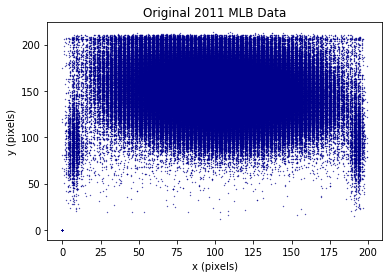

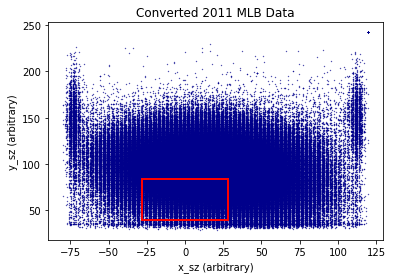

In [15]:
clean_data.plot.scatter(x='x', y='y', c='DarkBlue', s=0.1)


# Add labels and title
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
#plt.xlim(0,220)
#plt.ylim(0,250)
plt.title('Original 2011 MLB Data')

# Show the plot
plt.show()

fig, ax = plt.subplots()

ax.scatter(x=-1.0*(clean_data["x"]-119.49), y=-1.0*(clean_data["y"]-242.22), c='DarkBlue', s=0.1)

# Add labels and title
plt.xlabel('x_sz (arbitrary)')
plt.ylabel('y_sz (arbitrary)')
#plt.xlim(0,220)
#plt.ylim(0,250)
plt.title('Converted 2011 MLB Data')

# use an estimated factor of 40x and 25y to scale strike zone
# convert the width of the strike zone (home plate is 17 in) to feet from inches
new_width = 40.0*17.0/12.0

# Create a rectangle for the strike zone
rect = patches.Rectangle((-1.0*new_width/2.0, 25.0*1.60), new_width, 25.0*(3.37-1.60), linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the axes
ax.add_patch(rect)

# Show the plot
plt.show()


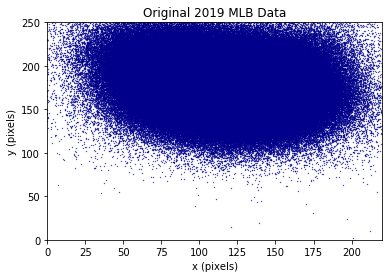

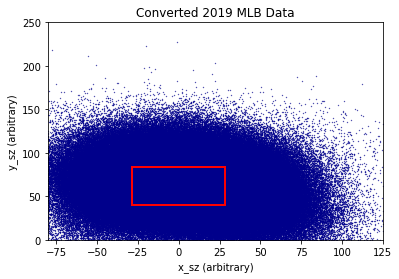

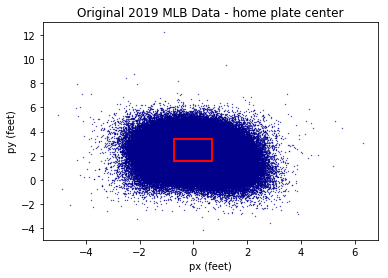

In [16]:

compare_data_cl2.plot.scatter(x='xc', y='yc', c='DarkBlue', s=0.1)


# Add labels and title
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.xlim(0,220)
plt.ylim(0,250)
plt.title('Original 2019 MLB Data')

# Show the plot
plt.show()


fig, ax = plt.subplots()

ax.scatter(x=-1.0*(compare_data_cl2["xc"]-119.49), y=-1.0*(compare_data_cl2["yc"]-242.22), c='DarkBlue', s=0.1)

# Add labels and title
plt.xlabel('x_sz (arbitrary)')
plt.ylabel('y_sz (arbitrary)')
plt.xlim(-80,125)
plt.ylim(0,250)
plt.title('Converted 2019 MLB Data')


# use a estimated factor of 40x and 25y to scale strike zone
# width of strike zone in feet from inches
new_width = 40.0*17.0/12.0

# Create a rectangle for the strike zone
rect = patches.Rectangle((-1.0*new_width/2.0, 25.0*1.60), new_width, 25.0*(3.37-1.60), linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the axes
ax.add_patch(rect)

# Show the plot
plt.show()


# Create figure and axes
fig, ax = plt.subplots()

ax.scatter(x=compare_data_cl2["px"], y=compare_data_cl2["pz"], c='DarkBlue', s=0.1)

# Add labels and title
plt.xlabel('px (feet)')
plt.ylabel('py (feet)')
#plt.xlim(-80,125)
#plt.ylim(0,250)
plt.title('Original 2019 MLB Data - home plate center')


# width of strike zone in feet from inches
width = 17.0/12.0

# Create a rectangle for the strike zone
rect = patches.Rectangle((-1.0*width/2.0, 1.60), width, 3.37-1.60, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the axes
ax.add_patch(rect)

# Show the plot
plt.show()

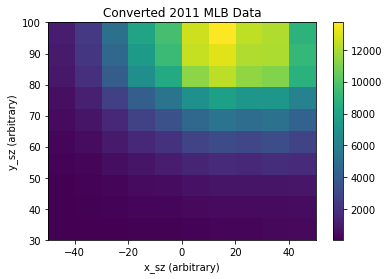

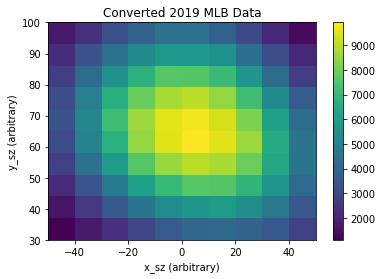

In [17]:
plt.hist2d(-1.0*(clean_data["x"]-119.49), -1.0*(clean_data["y"]-242.22), bins=[10,10], range=[[-50, 50], [30, 100]])
plt.colorbar()


# Add labels and title
plt.xlabel('x_sz (arbitrary)')
plt.ylabel('y_sz (arbitrary)')
#plt.xlim(-80,125)
#plt.ylim(0,250)
plt.title('Converted 2011 MLB Data')


# Show the plot
plt.show()


plt.hist2d(-1.0*(compare_data_cl2["xc"]-119.49), -1.0*(compare_data_cl2["yc"]-242.22), bins=[10,10], range=[[-50, 50], [30, 100]])
plt.colorbar()

# Add labels and title
plt.xlabel('x_sz (arbitrary)')
plt.ylabel('y_sz (arbitrary)')
#plt.xlim(-80,125)
#plt.ylim(0,250)
plt.title('Converted 2019 MLB Data')

# Show the plot
plt.show()

## Plots of the pitch types in the strike zone - Analysis Notes
- There are more data points in the center of the strike zone for the 2019 data.
- The trends in the histogram from the original data shift up in the converted data.
- The bin with the highest number of points will be chosen as the location to find most the pitches of that type.
- The slider (SL) will move to the bottom right of the strike zone for a right handed pitcher (the training data will select for this).

In [18]:

# select the pitch types from the 2019 data

FF = compare_data_cl2.loc[compare_data_cl2["pitch_type"] == "FF"]

print(FF.shape)

CU = compare_data_cl2.loc[compare_data_cl2["pitch_type"] == "CU"]

print(CU.shape)

SL = compare_data_cl2.loc[compare_data_cl2["pitch_type"] == "SL"]

print(SL.shape)

(260698, 37)
(63911, 37)
(127345, 37)


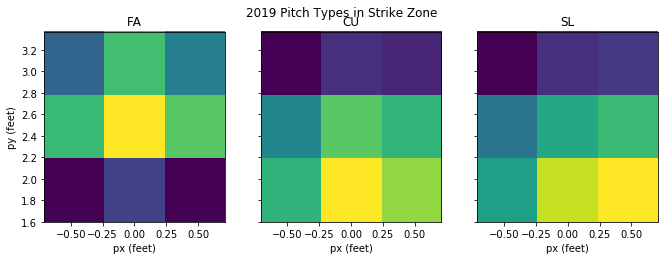

In [19]:

# analyze where the pitch types are located in the strike zone from the 2019 data
# the number of points in the sample is identical for each plot

fig, axs = plt.subplots(1, 3, figsize=(11, 3.5)) 
axs[0].hist2d(FF['px'].sample(n=63911), FF['pz'].sample(n=63911), range=[[-1.0*width/2.0, 1.0*width/2.0], [1.60, 3.37]], bins=[3,3])
axs[0].set_title('FA')
axs[1].hist2d(CU['px'].sample(n=63911), CU['pz'].sample(n=63911), range=[[-1.0*width/2.0, 1.0*width/2.0], [1.60, 3.37]], bins=[3,3])
axs[1].set_title('CU')
axs[2].hist2d(SL['px'].sample(n=63911), SL['pz'].sample(n=63911), range=[[-1.0*width/2.0, 1.0*width/2.0], [1.60, 3.37]], bins=[3,3])
axs[2].set_title('SL')

fig.suptitle('2019 Pitch Types in Strike Zone')

for ax in axs.flat:
    ax.set(xlabel='px (feet)', ylabel='py (feet)')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

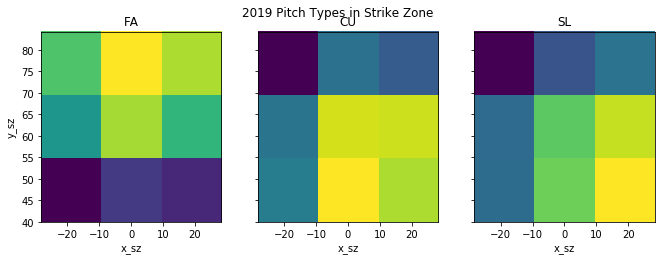

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(11, 3.5))

axs[0].hist2d(-1.0*(FF["xc"].sample(n=63911)-119.49), -1.0*(FF["yc"].sample(n=63911)-242.22), range=[[-1.0*new_width/2.0, 1.0*new_width/2.0], [25.0*1.60, 25.0*3.37]], bins=[3,3])
axs[0].set_title('FA')

axs[1].hist2d(-1.0*(CU["xc"].sample(n=63911)-119.49), -1.0*(CU["yc"].sample(n=63911)-242.22), range=[[-1.0*new_width/2.0, 1.0*new_width/2.0], [25.0*1.60, 25.0*3.37]], bins=[3,3])
axs[1].set_title('CU')

axs[2].hist2d(-1.0*(SL["xc"].sample(n=63911)-119.49), -1.0*(SL["yc"].sample(n=63911)-242.22), range=[[-1.0*new_width/2.0, 1.0*new_width/2.0], [25.0*1.60, 25.0*3.37]], bins=[3,3])
axs[2].set_title('SL')

fig.suptitle('2019 Pitch Types in Strike Zone')


for ax in axs.flat:
    ax.set(xlabel='x_sz', ylabel='y_sz')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

## Prepare the training data set

In [21]:
# Convert from Gameday to strike zone coordinates
# Add two columns for the strike zone coordinates

clean_data['x_sz'] = (-1.0*(clean_data["x"]-119.49))

clean_data['y_sz'] = (-1.0*(clean_data["y"]-242.22))

print(clean_data.shape)


(718961, 41)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
# These are the xy coordinates for the edges of the 9 bins in the histogram plots above

xedges =  [-28.33333333, -9.44444444, 9.44444444, 28.33333333]

yedges =  [40.0, 54.75, 69.5, 84.25]


# assign the pitch types in the max bin (histogram) and assign an integer to identify each pitch type
# Four seam fastball (FA) = 0, Curveball (CU) = 1, Slider (SL) = 2

FA = clean_data[(clean_data['x_sz'] > xedges[1]) & (clean_data['x_sz'] < xedges[2]) & (clean_data['y_sz'] > yedges[2]) & (clean_data['y_sz'] < yedges[3])]

FA["pitch_type"] = 0

CU = clean_data[(clean_data['x_sz'] > xedges[1]) & (clean_data['x_sz'] < xedges[2]) & (clean_data['y_sz'] > yedges[1]) & (clean_data['y_sz'] < yedges[2])]

CU["pitch_type"] = 1

SL = clean_data[(clean_data['x_sz'] > xedges[2]) & (clean_data['x_sz'] < xedges[3]) & (clean_data['y_sz'] > yedges[1]) & (clean_data['y_sz'] < yedges[2])]

SL["pitch_type"] = 2

t_data = pd.concat([FA, CU, SL])

print(FA.shape, CU.shape, SL.shape, t_data.shape)

print(t_data)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

((28989, 42), (10580, 42), (13376, 42), (52945, 42))
             uid  game_pk  year        date  team_id_b  team_id_p  inning  \
18      14143244   286874  2011  2011-03-31        108        118       1   
33      14143259   286874  2011  2011-03-31        118        108       1   
96      14143322   286874  2011  2011-03-31        108        118       4   
103     14143329   286874  2011  2011-03-31        108        118       4   
119     14143345   286874  2011  2011-03-31        118        108       4   
145     14143371   286874  2011  2011-03-31        108        118       5   
159     14143385   286874  2011  2011-03-31        108        118       5   
210     14143436   286874  2011  2011-03-31        108        118       7   
253     14143479   286874  2011  2011-03-31        108        118       8   
256     14143482   286874  2011  2011-03-31        108        118       8   
262     14143488   286874  2011  2011-03-31        108        118       8   
271     14143497   2868

## Selected features in the training data
- To simplify, the features known prior to the pitch are selected. <br> <br>
    - Teams: team_id_b, team_id_p 
    - In Game Information: inning, top, at_bat_num, pcount_at_bat, balls, strikes, fouls, outs, away_team_runs, home_team_runs    
    - Batter Information: batter_id, stand, b_height
    - Pitcher Information: pcount_pitcher, pitcher_id, p_throws

In [23]:
# keep the columns with the selected features

t_data.drop(['uid', 'game_pk', 'year', 'date', 'is_final_pitch','final_balls', 'final_strikes', 'final_outs', 'start_tfs','start_tfs_zulu', 'at_bat_des', 'event', 'pitch_des', 'pitch_id', 'type', 'created_at', 'added_at', 'modified_at', 'modified_by', 'x', 'y', 'x_sz', 'y_sz'], axis=1, inplace=True)

t_data.columns

t_data.shape

(52945, 19)

In [24]:
print(t_data)

        team_id_b  team_id_p  inning  top  at_bat_num  pcount_at_bat  \
18            108        118       1    1           4              5   
33            118        108       1    0           7              8   
96            108        118       4    1          23              2   
103           108        118       4    1          24              3   
119           118        108       4    0          30              4   
145           108        118       5    1          34              7   
159           108        118       5    1          38              2   
210           108        118       7    1          53              1   
253           108        118       8    1          61              7   
256           108        118       8    1          62              3   
262           108        118       8    1          64              2   
271           118        108       8    0          66              5   
275           118        108       8    0          67           

In [25]:
# convert the batter height to inches

def convert_height(x):
        feet = re.findall('^[0-9]', x)[0]
        inches = re.findall('.[0-9]$', x)[0]
        return 12*int(feet) + abs(int(inches)) 
    
t_data['b_height_inches'] = t_data['b_height'].apply(convert_height)

t_data.drop('b_height', axis=1, inplace=True)

print(t_data.shape)

(52945, 19)


In [26]:
# change the left hand (L) and right hand (R) labels to integers for the model trainer
# L = 0, R = 1
    
def hand_to_int(x):
    if x == 'L':
        return 0
    else:
        return 1

t_data['stand'] = t_data['stand'].apply(hand_to_int)

t_data['p_throws'] = t_data['p_throws'].apply(hand_to_int)

print(t_data.shape)

(52945, 19)


In [27]:
# select the right handed pitchers from the training data

t_data_final = t_data.loc[t_data["p_throws"] == 1]

print(t_data_final.shape)

(36525, 19)


In [28]:
print(t_data_final)

        team_id_b  team_id_p  inning  top  at_bat_num  pcount_at_bat  \
18            108        118       1    1           4              5   
33            118        108       1    0           7              8   
96            108        118       4    1          23              2   
103           108        118       4    1          24              3   
119           118        108       4    0          30              4   
145           108        118       5    1          34              7   
159           108        118       5    1          38              2   
210           108        118       7    1          53              1   
253           108        118       8    1          61              7   
256           108        118       8    1          62              3   
262           108        118       8    1          64              2   
271           118        108       8    0          66              5   
275           118        108       8    0          67           

## Train the model with a classifier

In [29]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = t_data_final.drop('pitch_type', axis=1)
y = t_data_final['pitch_type'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, y.shape)

((36525, 18), (36525,))


In [30]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='multi:softprob')

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Evaluation of the model

In [31]:
# Predict the probability of each pitch type by running the model on the test data
# Four seam fastball (FA) = 0, Curveball (CU) = 1, Slider (SL) = 2

y_pred_proba = model.predict_proba(X_test)

print(y_pred_proba)

print(y_pred_proba.shape)

[[0.52894753 0.1436121  0.32744038]
 [0.5435934  0.17533478 0.28107178]
 [0.5718554  0.14644136 0.28170317]
 ...
 [0.43613052 0.2776084  0.28626108]
 [0.57294273 0.13605736 0.29099992]
 [0.5174075  0.15643622 0.32615632]]
(7305, 3)


In [32]:
# Calculate the accuracy

accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.06%


//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
# Predict the most likely class by running the model on the test data

y_pred = model.predict(X_test)

print(y_pred.shape)

print(y_pred[0:10])

(7305,)
[0 0 0 0 0 0 0 0 0 0]


//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
from sklearn.metrics import classification_report

# Print the classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.55      1.00      0.71      4020
          1       0.00      0.00      0.00      1357
          2       0.41      0.01      0.01      1928

avg / total       0.41      0.55      0.39      7305

